In [3]:
from google.colab import files
uploaded = files.upload()  # Select and upload your CSV files


Saving emotional_features.csv to emotional_features.csv
Saving profile_features.csv to profile_features.csv
Saving statistical_features.csv to statistical_features.csv
Saving textual_features.csv to textual_features.csv


In [4]:
from google.colab import files
uploaded = files.upload()  # Select and upload your CSV files


Saving Users.csv to Users.csv


In [1]:
!pip install xgboost pandas scikit-learn seaborn matplotlib imbalanced-learn shap nltk transformers textblob


In [2]:
import os
print(os.listdir())  # Lists all files in the current directory


['.config', 'sample_data']


In [5]:
import pandas as pd

# Load dataset (Ensure filenames match exactly)
users = pd.read_csv("Users.csv")
profile = pd.read_csv("profile_features.csv")
statistical = pd.read_csv("statistical_features.csv")
emotional = pd.read_csv("emotional_features.csv")
textual = pd.read_csv("textual_features.csv")

# Check if datasets are loaded correctly
print("Users Data:\n", users.head())
print("Profile Features:\n", profile.head())
print("Statistical Features:\n", statistical.head())
print("Emotional Features:\n", emotional.head())
print("Textual Features:\n", textual.head())


Users Data:
    user_id  N_False  N_True
0      344        0       1
1     1198        2       0
2      584        0       1
3     1222        0       1
4      537        2       0
Profile Features:
    user_id  statuses_count  followers_count  following_count  \
0      346        0.110131         0.269398         0.755670   
1     1217        0.963784         0.102310         0.001567   
2      590        0.433809         0.661664         0.601345   
3     1243        0.965000         0.166515         0.150806   
4      543        0.566996         0.073917         0.010032   

   favourites_count  listed_count  default_profile  verified  tweet_freq  \
0          0.374446      0.000000         0.001694       0.0    0.055066   
1          0.225275      0.000114         0.000000       0.0    0.096378   
2          0.014077      0.000164         0.000016       0.0    0.048201   
3          0.091580      0.000026         0.000026       0.0    0.096500   
4          0.812864      0.000091  

In [8]:
import nltk
nltk.download('punkt')  # Already downloaded
nltk.download('averaged_perceptron_tagger')  # Ensures tokenization works properly


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
!pip install --upgrade --force-reinstall nltk
import nltk
nltk.download('punkt')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
  Attempting uninstall: regex
    Found existing installation: regex 2024.11.6
    Uninstalling regex-2024.11.6:
      Successfully uninstalled regex-2024.11.6
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Drop columns only if they exist
columns_to_drop = [col for col in ["tri_grams", "user_id"] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

print("Updated feature set shape:", df.shape)


Updated feature set shape: (1573, 5043)


In [ ]:
print("Textual Features Columns:", textual.columns)


Textual Features Columns: Index(['user_id', 'tri_grams'], dtype='object')


In [ ]:
text_features = vectorizer.fit_transform(textual['tri_grams'].astype(str)).toarray()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
text_features = vectorizer.fit_transform(textual['tri_grams'].astype(str)).toarray()


In [ ]:
import pandas as pd

# Convert TF-IDF features into DataFrame
text_features_df = pd.DataFrame(text_features, columns=[f"tfidf_{i}" for i in range(text_features.shape[1])])

# Add user_id to keep track of users
text_features_df["user_id"] = textual["user_id"]

# Check shape
print("TF-IDF Feature Shape:", text_features_df.shape)


TF-IDF Feature Shape: (1542, 5001)


In [ ]:
# Merge all datasets on 'user_id'
df = users.merge(profile, on="user_id", how="left") \
          .merge(statistical, on="user_id", how="left") \
          .merge(emotional, on="user_id", how="left") \
          .merge(text_features_df, on="user_id", how="left")

# Drop 'user_id' since it's no longer needed
df.drop(columns=["user_id"], inplace=True)

# Check final shape
print("Final dataset shape:", df.shape)


Final dataset shape: (1546, 5042)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Fill missing values with 0
df.fillna(0, inplace=True)

# Scale numerical features
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

print("Dataset after preprocessing:", df.head())


Dataset after preprocessing:    N_False    N_True  statuses_count  followers_count  following_count  \
0      0.0  0.012987        0.505687         0.124945         0.229779   
1      0.1  0.000000        0.048956         0.996518         0.000038   
2      0.0  0.012987        0.704554         0.080170         0.680921   
3      0.0  0.012987        0.550452         0.834350         0.014586   
4      0.1  0.000000        0.068201         0.986886         0.000038   

   favourites_count  listed_count  default_profile  verified  tweet_freq  ...  \
0          0.000000      0.000000         0.137369  0.000000    0.360722  ...   
1          0.000000      0.066044         0.000000  0.003791    0.006986  ...   
2          0.166480      0.000000         0.132213  0.000000    0.111583  ...   
3          0.026654      0.132732         0.000000  0.202689    0.060330  ...   
4          0.000114      0.017075         0.000000  0.000000    0.010819  ...   

   tfidf_4990  tfidf_4991  tfidf_4992  

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop(columns=["N_False", "N_True"])
y = (df["N_False"] > 0).astype(int)  # 1 = Fake news spreader, 0 = Not

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1236, 5040)
Testing set size: (310, 5040)


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define models
models = {
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"📌 Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


📌 Model: XGBoost
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       196
           1       0.45      0.25      0.32       114

    accuracy                           0.61       310
   macro avg       0.55      0.54      0.52       310
weighted avg       0.58      0.61      0.58       310

--------------------------------------------------
📌 Model: Random Forest
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       196
           1       0.67      0.05      0.10       114

    accuracy                           0.64       310
   macro avg       0.65      0.52      0.44       310
weighted avg       0.65      0.64      0.53       310

--------------------------------------------------
📌 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.64      0.99      0.77       196
           1       0.60      0.03      0.05       114

    accurac

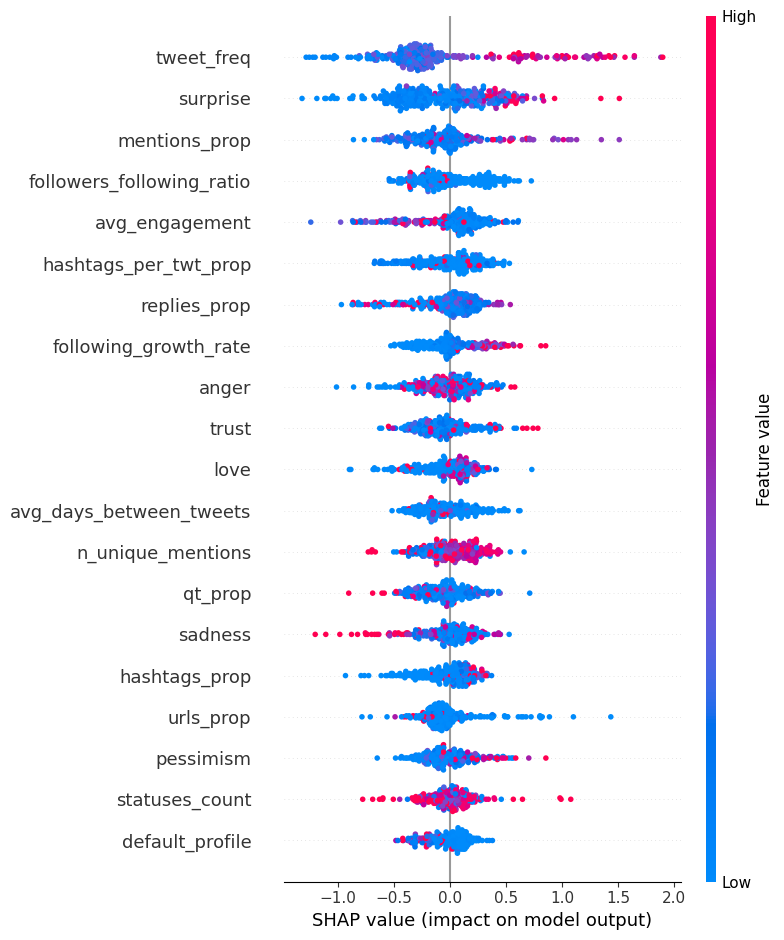

In [ ]:
import shap
import matplotlib.pyplot as plt

# Explain the best model (XGBoost)
explainer = shap.Explainer(models["XGBoost"])
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results
model_results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_results["Model"].append(name)
    model_results["Accuracy"].append(round(accuracy, 3))
    model_results["Precision"].append(round(precision, 3))
    model_results["Recall"].append(round(recall, 3))
    model_results["F1-score"].append(round(f1, 3))

# Convert to DataFrame
results_df = pd.DataFrame(model_results)
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-score
0              XGBoost     0.613      0.452   0.246     0.318
1        Random Forest     0.642      0.667   0.053     0.098
2  Logistic Regression     0.635      0.600   0.026     0.050


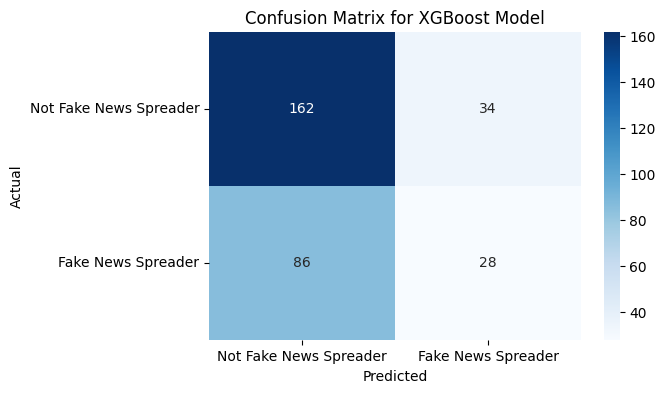

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for the best model (XGBoost)
y_pred = models["XGBoost"].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fake News Spreader", "Fake News Spreader"], yticklabels=["Not Fake News Spreader", "Fake News Spreader"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()


In [ ]:
import joblib

# Save the best-performing model (XGBoost)
joblib.dump(models["XGBoost"], "best_model.pkl")

# Download the model file
from google.colab import files
files.download("best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score

# Get predictions from XGBoost model
y_pred_xgb = models["XGBoost"].predict(X_test)

# Calculate accuracy manually
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"✅ XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")


✅ XGBoost Accuracy: 61.29%


Class Distribution in Training Data: [806 430]


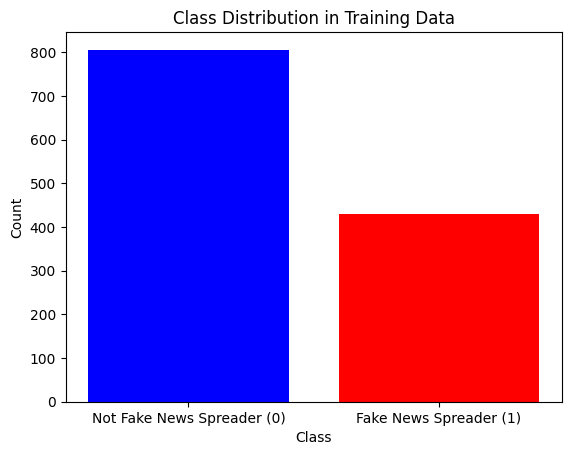

In [ ]:
import numpy as np

# Count class distribution
class_counts = np.bincount(y_train)
print(f"Class Distribution in Training Data: {class_counts}")

# Plot distribution
import matplotlib.pyplot as plt
plt.bar(["Not Fake News Spreader (0)", "Fake News Spreader (1)"], class_counts, color=['blue', 'red'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance data
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Balanced class distribution: {np.bincount(y_train_balanced)}")


Balanced class distribution: [806 806]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring="accuracy", cv=3, verbose=1)

# Fit model
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model
best_xgb = grid_search.best_estimator_

# Train on best parameters
best_xgb.fit(X_train_balanced, y_train_balanced)

# Get predictions
y_pred_best_xgb = best_xgb.predict(X_test)

# Calculate new accuracy
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"✅ Improved XGBoost Accuracy: {best_xgb_accuracy * 100:.2f}%")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
✅ Improved XGBoost Accuracy: 58.06%
